<a href="https://colab.research.google.com/github/Dogyun-Kim57/AI_26/blob/main/02_01_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 전에 훈련한 데이터는 fit와 score를 같은 값으로 사용했다
# 그래서 평가점수를 보면 100%로 나옴 이것을 해결해보자.

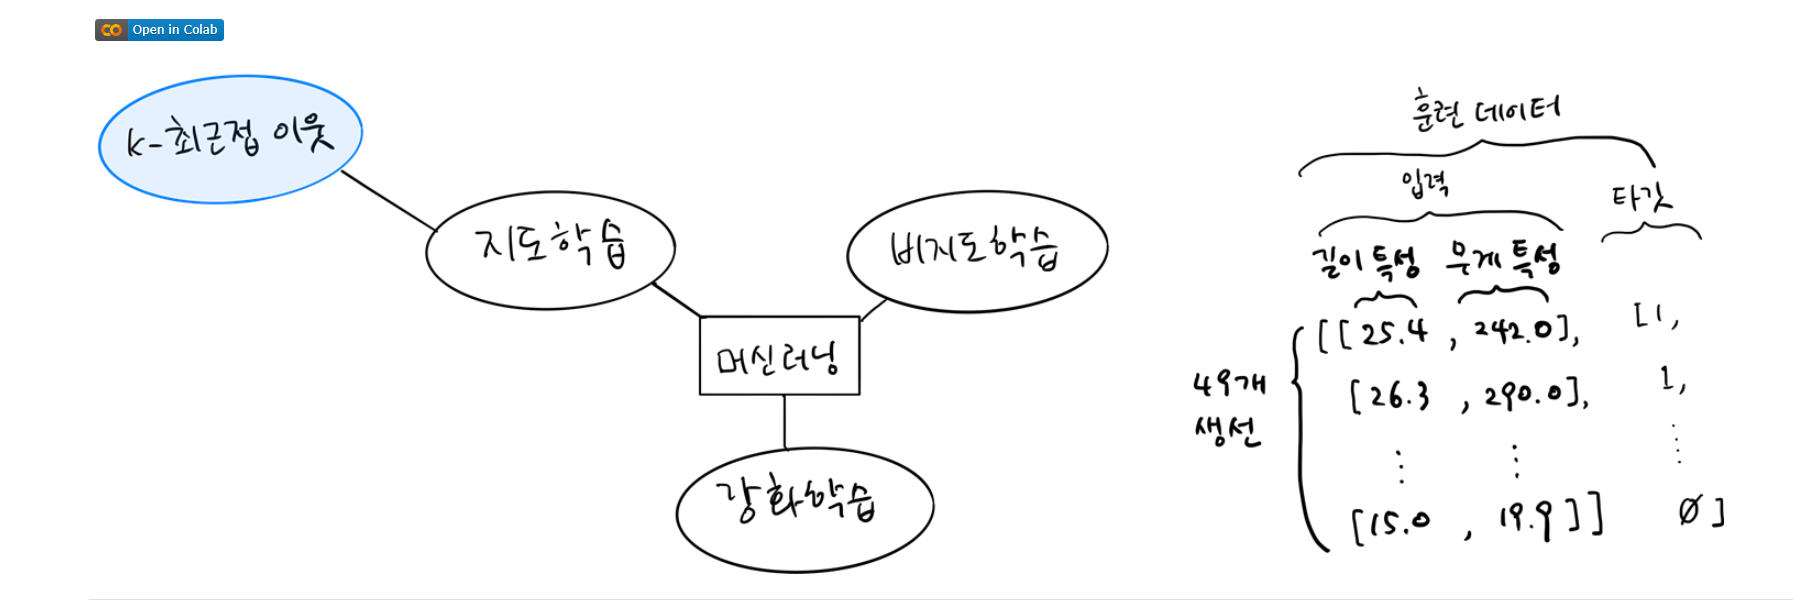

In [ ]:
# 지도학습은 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습함
# 비지도학습은 타깃 없이 입력 데이터만 사용함(정답을 사용하지 않음)
# 무언가를 맞힐 수 없으나 대신 데이터를 잘 파악하거나 변형하는데 도움을 줌

# ai는 100점을 원하면 안됨! -> 과대 적합 -> 85% ~ 90% ???

# 머신 러닝에서 알고리즘 성능을 제대로 평가하려면 훈련데이터와 평가데이터를 나누어 학습
# 평가를 위해서 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 활용

# 우리는 이미 준비된 데이터( 49개의 생선 )중에서 일부를 떼어 훈련용과 테스트용을 나누겠다.

In [8]:
# 도미(35개)와 빙어(14개) 데이터 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]   # 2차원 배열로 만듬
fish_target = [1]*35 + [0]*14        # 앞에서 35개는 1(도미), 뒤에 14개는 0(빙어)

In [7]:
# 이때 생선 데이터를 샘플이라고 부름 (도미 35개, 빙어 14개) 총 49개의 샘플
# 사용하는 특성은 길이와 무게 2개
# 이것을 처음 35개를 훈련세트로, 나머지 14개를 테스트 세트로 사용하겠음

from sklearn.neighbors import KNeighborsClassifier           # K-이웃 근접 알고리즘(분류용)
kn = KNeighborsClassifier() # 객체 생성함

print(fish_data[4]) # 인덱스는 0부터 시작함 5번째 값이 나옴

[29.0, 430.0]


In [2]:
print(fish_data[0:5]) # 슬라이싱 0~4 인덱스 까지 출력 (마지막 숫자 번호 전까지)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [3]:
print(fish_data[:5])  # 처음부터 5-1 인덱스까지

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [4]:
print(fish_data[44:]) # 44~ 끝까지

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [65]:
# 2차원 배열로 만들어진 전처리 데이터를 나누어 훈련용(.fit), 평가용(.score)로 사용해보자.
# 생선 데이터에서 처음 35개와 나머지 14개를 선택해서 리스트로 생성함

train_input = fish_data[:35]
train_target = fish_target[:35] # 룬련세트로 0 ~ 34
test_input = fish_data[35:]
test_target = fish_target[35:] # 테스트 세트 35~ 마지막까지

In [66]:
kn.fit(train_input, train_target)    # 훈련세트로 fit 진행
kn.score(test_input, test_target)    # 테스트 시작
# 결론 train_input에는 도미데이터만 다량으로 존재, test_input에는 빙어데이터만 다량으로 존재
# 확율이 0.0 인 이유는 샘플링 편향 : 샘플링이 한쪽으로 치우침
# fit 데이터는 도미만, 평가데이터는 빙어만 되어 있음!

0.0

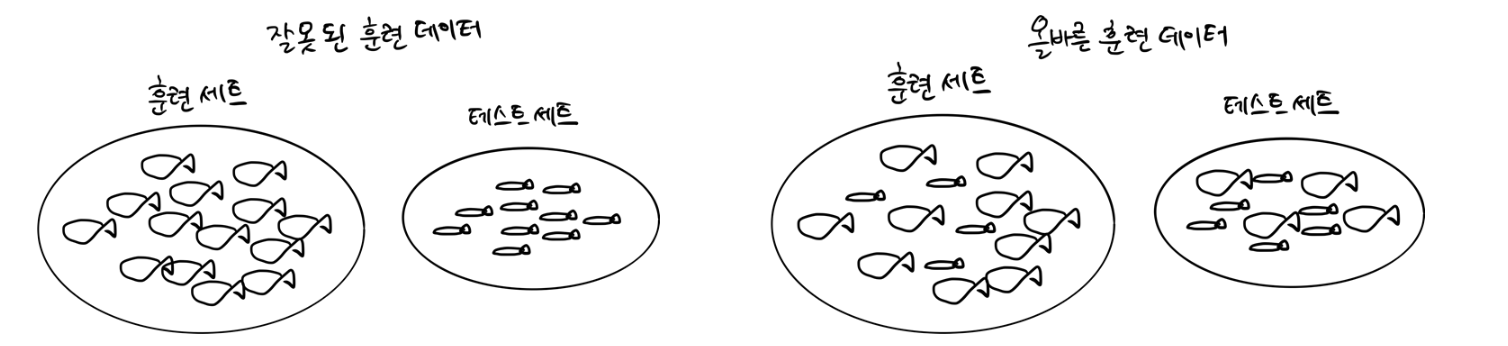

In [67]:
# 넘파이는 파이썬의 대표적인 배열 라이브러리임 -> 고차원배열을 손쉽게 조작
# pip install numpy -> 파이참에 설치 후 진행

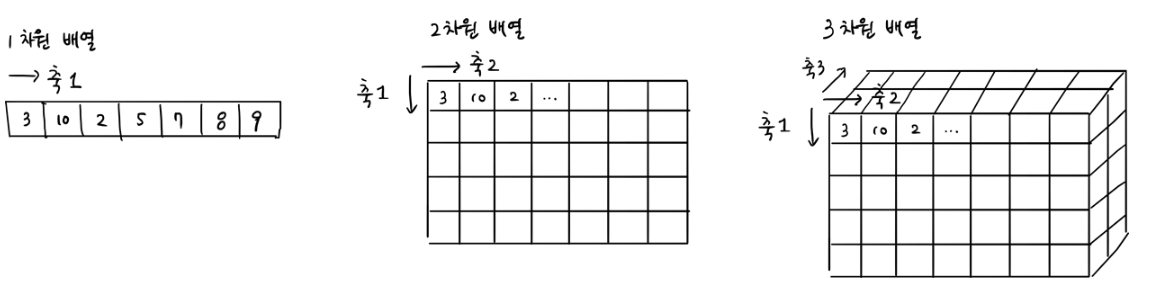

In [68]:
import numpy as np # 넘파이 클래스를 np라는 이름으로 사용(관례)

input_arr=np.array(fish_data)         # 요소의 배열 (49개)
target_arr=np.array(fish_target)      # 정답의 배열 (49개)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [51]:
print(target_arr)  # 1:도미 0:빙어

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [69]:
# 훈련용 데이터는 49개의 객체와 2개의 특성(길이,무게)을 가지고 있다.

# 배열의 크기를 알려주는 메서드 .shape  ( 앞으로 특성이 늘어날때 꼭 사용해야 될 구문 )
print(input_arr.shape)   # (샘플수, 특성수 = 길이,무게)

(49, 2)


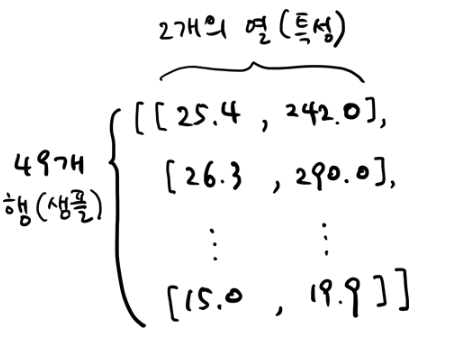

In [85]:
# 넘파이는 랜덤하게 샘플을 섞어 사용할 수 있다.
np.random.seed(42)          # .seed는 랜덤하게 섞는 기준을 정해서 수업시간에 결과가 같이 나옴
index = np.arange(49)       # 0 ~ 48까지 1씩 증가하는 배열
np.random.shuffle(index)    # 주어진 배열을 무작위로 섞음
print(index)                # 섞여진 인덱스 출력

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [86]:
# 전체 데이터를 훈련 세트와 테스트 세트로 나누어 보자.
# 넘파이는 슬라이싱 외에 배열 인덱싱이란 기능을 제공
# 배열 인덱싱은 1개의 인덱스가 아닌 여러개의 인덱스를 한 번에 여러 개 원소를 선택할 수 있다.
print(input_arr[[1,3]])            # 두번째와 네번째 샘플을 선택함

[[ 26.3 290. ]
 [ 29.  363. ]]


In [87]:
# 비슷한 방법으로는 리스트 대신 배열을 인덱스로 전달 할 수 있음(.fit)
train_input = input_arr[index[:35]]          # 훈련용 샘플 0 ~ 34
train_target = target_arr[index[:35]]        # 훈련용 정답 0 ~ 34

In [88]:
print(input_arr[13], train_input[0])
#     넘파이 랜덤 인덱스,     처음만든 인덱스
# 초기 만든 0번 값이 13번 인덱스로 랜덤 처리됨

[ 32. 340.] [ 32. 340.]


In [89]:
# 나머지 14개를 테스트 세트로 만들자! 35번 ~ 마지막 까지는 테스트용(.score)
test_input = input_arr[index[:35]]
test_target = target_arr[index[35:]]
# 이렇게 처리하면 샘플링 편향을 처리하기 위해서 랜덤하게 배치함.

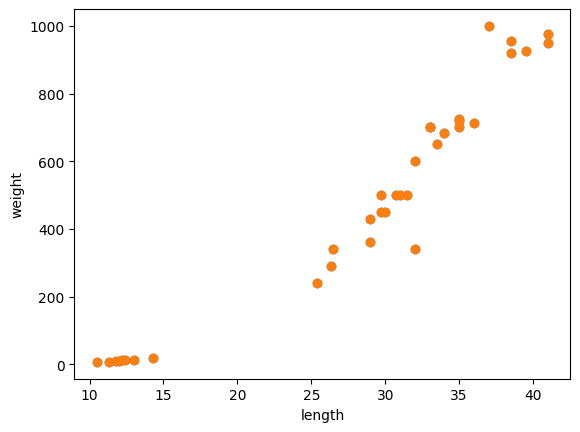

In [90]:
# 차트로 보기

import matplotlib.pyplot as plt

#         특성          길이               무게
plt.scatter(train_input[:,0], train_input[:,1])     # 훈련용 데이터셋(파란색)
plt.scatter(test_input[:,0], test_input[:,1])      # 테스트용 데이터셋(주황)
plt.xlabel('length')      # 생선의 길이
plt.ylabel('weight')      # 생선의 무게
plt.show()      # 훈련과 테스트용이 구분이 됨(도미와 빙어가 적절히 섞여 있음)

In [ ]:
# 전처리된 데이터를 참고하여 훈련시작!!

In [ ]:
# 전처리된 데이터를 참고하여 훈련시작!!
kn.fit(train_input,train_target)           # 파란색
kn.score(test_input,test_target)           # 노란색
# 훈련한것이 테스트로 점수를 보니 100%로 판단이 된다.

In [63]:
# 평가 후 결과보기
print(test_input)

[[9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
kn.predict(test_input)

In [ ]:
kn.predict([[25,150]])
# 길이가 25이고 무게가 150인데 도미가 아닌 빙어로 나옴..